# Mapping San Francisco crime in R

The data is from the Kaggle Competition, San Francisco Crime, with Dates, cataegory, and location of crime in San Francisco over ten years. For this notebook, I focus on location, using longitude/latitude and geospatial packages in R.

In [2]:
library(ggplot2)
library(ggmap)
library(sp)
library(maptools)
library(rgdal)
library(rgeos)
library(RColorBrewer)
library(dplyr)
options(jupyter.plot_mimetypes = 'image/png')

In [3]:
crime = read.csv('train.csv')
str(crime)

'data.frame':	878049 obs. of  9 variables:
 $ Dates     : Factor w/ 389257 levels "2003-01-06 00:01:00",..: 389257 389257 389256 389255 389255 389255 389255 389255 389254 389254 ...
 $ Category  : Factor w/ 39 levels "ARSON","ASSAULT",..: 38 22 22 17 17 17 37 37 17 17 ...
 $ Descript  : Factor w/ 879 levels "ABANDONMENT OF CHILD",..: 867 811 811 405 405 407 740 740 405 405 ...
 $ DayOfWeek : Factor w/ 7 levels "Friday","Monday",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ PdDistrict: Factor w/ 10 levels "BAYVIEW","CENTRAL",..: 5 5 5 5 6 3 3 1 7 2 ...
 $ Resolution: Factor w/ 17 levels "ARREST, BOOKED",..: 1 1 1 12 12 12 12 12 12 12 ...
 $ Address   : Factor w/ 23228 levels "0 Block of  HARRISON ST",..: 19791 19791 22698 4267 1844 1506 13323 18055 11385 17659 ...
 $ X         : num  -122 -122 -122 -122 -122 ...
 $ Y         : num  37.8 37.8 37.8 37.8 37.8 ...


In [4]:
#remove those with Y=90.0
crime = crime[crime$Y!=90.0,]

# Use ggmap to plot crime locations

The package ggmap in R makes mapping much easier. The function get_map() can get map data from google map, openstreetmap, at specificied locations and zoom level, and style. Then use ggplot() to add layers of data on top of the map.

In [5]:
locations = c(left = -122.5222, 
                bottom = 37.7073, 
                right = -122.3481,
                top = 37.8381)
map_data = get_map(location=locations, zoom=12, source='osm',color='bw')

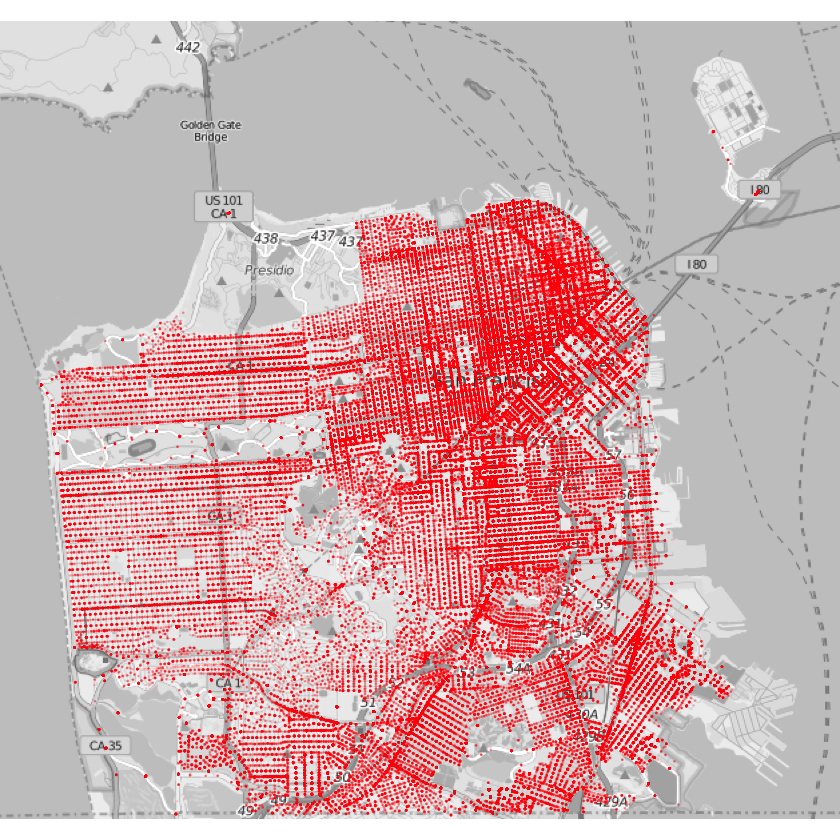

In [6]:
ggmap(map_data,extent='device') + 
geom_point(aes(x=X,y=Y),data=crime,alpha=0.1,color='red',size=0.1)

# Map selected categories of crime

The aggregate plot of all crimes is not very informative. The function 'map_crime' can plot selected category or categories of crime, to make it easier to visualize the locations of a particular type of crime.

In [8]:
map_crime = function(df, categories){
	filtered = filter(df, Category %in% categories)
	plot = ggmap(map_data, extent='device') + geom_point(data=filtered, aes(x=X,y=Y,color=Category),alpha=0.1,size=0.3)
	return(plot)
}

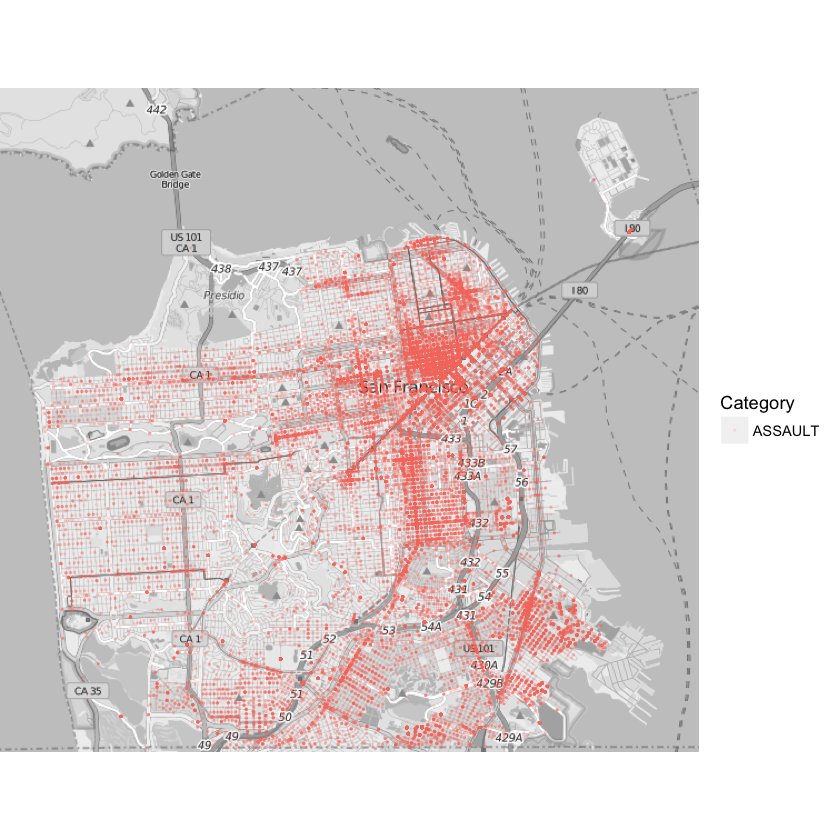

In [9]:
map_crime(crime, 'ASSAULT')

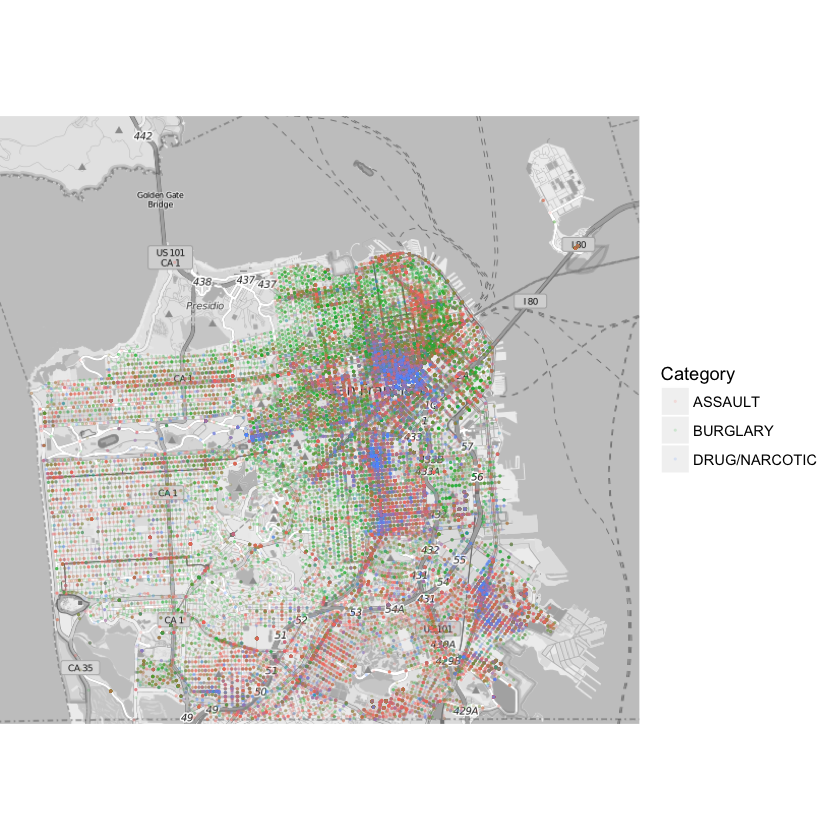

In [10]:
map_crime(crime, c('ASSAULT','DRUG/NARCOTIC','BURGLARY'))

# Density Plot of crime

With density plot, it is clear that tenderloin is the hotspot for crime. 
<br>
Among three major categories, assult, burglary, and drug/narcotics, drug/narcotics is very concentrated in the tenderloin district, whereas assault and burglary are more spread out.

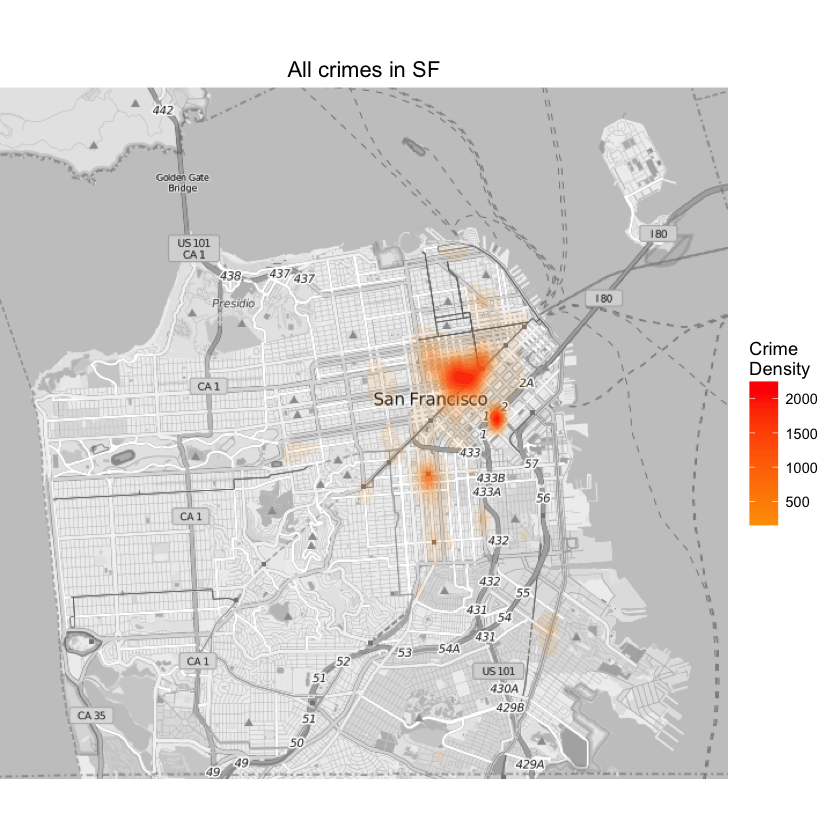

In [44]:
contours <- stat_density2d(
aes(x = X, y = Y, fill = ..level.., alpha=..level..),
size = 0.1, data = crime, n=200,geom = "polygon")

ggmap(map_data, extent='device') + contours +
scale_alpha_continuous(range=c(0.1,0.5), guide='none') +
scale_fill_gradient2('Crime\nDensity',low = "white", mid = "orange", high = "red") +
ggtitle('All crimes in SF')

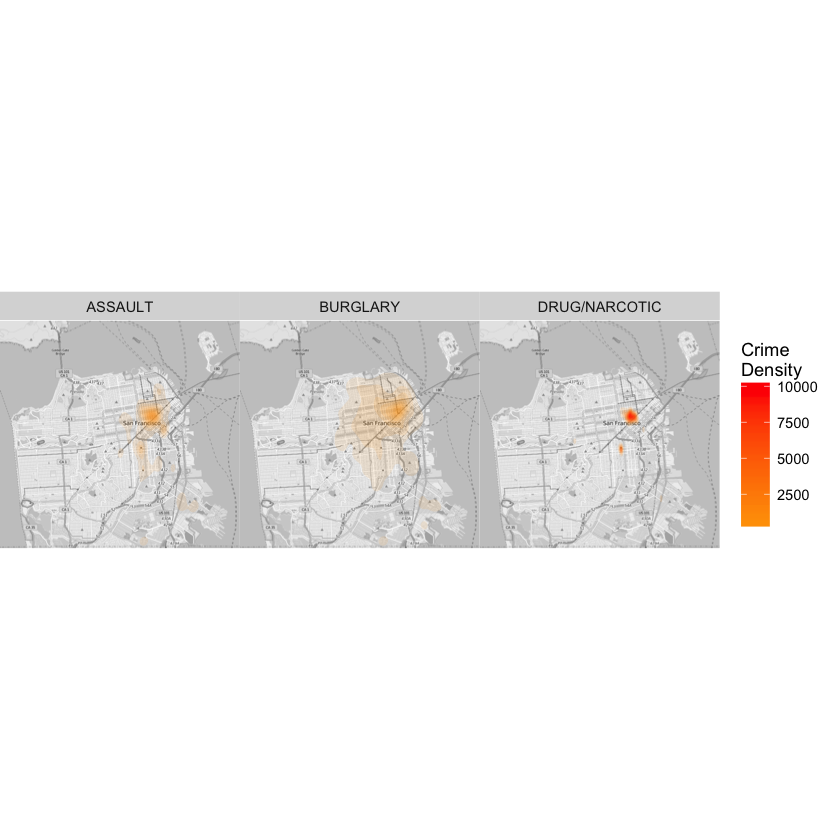

In [13]:
crime_subset = filter(crime, Category %in% c('ASSAULT','DRUG/NARCOTIC','BURGLARY'))

contours <- stat_density2d(
aes(x = X, y = Y, fill = ..level.., alpha=..level..),
size = 0.1, data = crime_subset, n=200,geom = "polygon")

ggmap(map_data, extent='device') + contours +
scale_alpha_continuous(range=c(0.1,0.5), guide='none') +
scale_fill_gradient2('Crime\nDensity',low = "white", mid = "orange", high = "red") +
facet_wrap(~Category)